In [5]:
import json
import networkx as nx
#from networkx import graphviz_layout
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.cm as cm

from sklearn.preprocessing import normalize
from matplotlib.widgets import Button
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from matplotlib.patches import Wedge


import sys
from PyQt5.QtWidgets import QDialog, QApplication, QPushButton, QVBoxLayout, QLabel, QComboBox, QStyleFactory, \
    QGridLayout, QSlider
import pandas as pd
import re
import pyqtgraph as pg
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from PyQt5.QtCore    import Qt
from PyQt5.uic.properties import QtWidgets, QtCore

from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg as FigureCanvas
from matplotlib.backends.backend_qt5agg import NavigationToolbar2QT as NavigationToolbar
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import random
from matplotlib.colors import Normalize

from matplotlib.figure import Figure
import math

from sklearn.preprocessing import normalize
from anytree import Node, RenderTree, AsciiStyle, PreOrderIter, PostOrderIter
from anytree.importer import DictImporter

In [6]:
with open('flare.json') as f:
    js_data = json.loads(f.read())

In [7]:
#create graph
importer = DictImporter()
root = importer.import_(js_data )

children_curr = [root]
cols = {}
for j in children_curr:
    #print('y',j)
    c = 0
    for i in PostOrderIter(j):
        try :
            c += i.value
        except AttributeError:
            continue
    cols[j.name] = c
    try:
        #print((list(j.children)))
        children_curr+=(list(j.children))
    except:
        continue

node_lis = []
edge_lis = []
col_lis = []


#adds nodes vals and edge vals to lists for network
def parse_json(parent, data):
    curr = parent
    if curr != None:
        edge_lis.append((parent, data['name']))
   
    col_lis.append(cols[data['name']])
    node_lis.append(data['name'])
    if 'children' in data:
        for i in data['children']:
            parse_json(data['name'],i)
        
    else:
        return
  
parse_json(None, js_data)


G = nx.DiGraph()
G.add_nodes_from(node_lis)
G.add_edges_from(edge_lis)



sh = nx.shortest_path_length(G, 'flare')


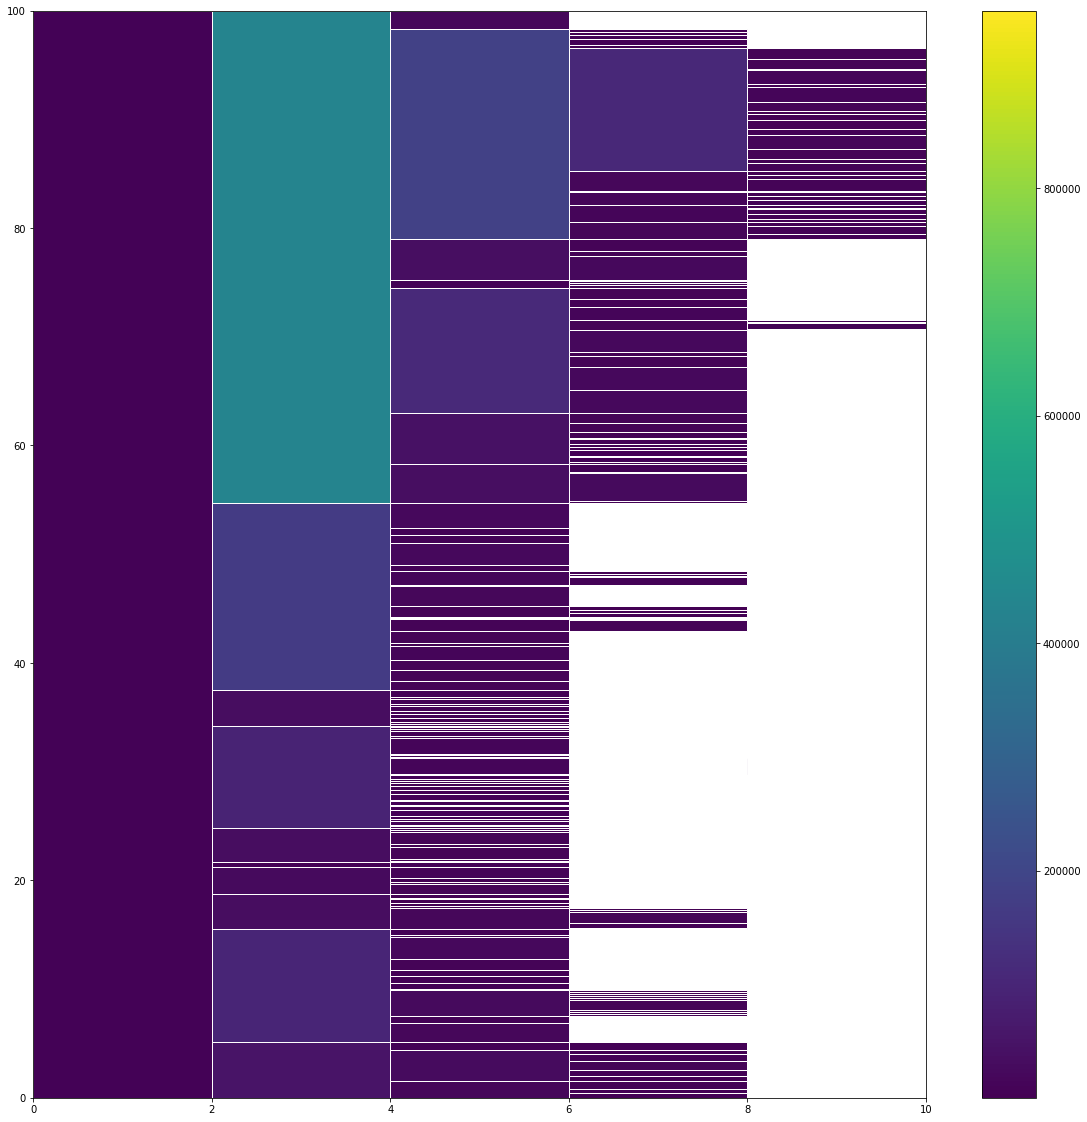

In [8]:
# #2
# #ADD LEGEND

#ENTER VALUE FROM 0-5
VALUE = 5


sh = nx.shortest_path_length(G, 'flare')
fig, ax = plt.subplots(figsize=(20,20))


plt.xlim([0, 10])
plt.ylim([0, 100])
sh = nx.shortest_path_length(G, 'flare')

importer = DictImporter()
root = importer.import_(js_data)
pat = {}
max_val = 956129
def parse_json2(parent, data, value):     
    curr = parent
    if sh[data.name] >= value:
        return
    if curr == None:
        ax.add_patch(Rectangle((0, 0), 2, 100, edgecolor= 'white', facecolor=cm.viridis(1)))
        pat[data.name]=[(0,0), 2, 100]
    elif curr !=None:

        gr_info_p = pat[parent]
        size_num_p = cols[parent]
        level = sh[parent]
        node_size = cols[data.name]
        x = (level + 1)*2
        size_perc = (cols[data.name]/max_val)*100
        y = gr_info_p[0][1] 
        ax.add_patch(Rectangle((x,y),2,size_perc, edgecolor ='white', facecolor=cm.viridis(node_size/max_val)))
        t = [(gr_info_p[0][0], gr_info_p[0][1]+size_perc), gr_info_p[1], gr_info_p[2]]
        pat[parent] = t
        pat[data.name] = [(x,y),2,size_perc]


   
    if len(data.children) == 0:
        return
    
    for i in data.children:

            parse_json2(i.parent.name,i, value)
            
    return 
  

parse_json2(None, root, VALUE)
c = plt.get_cmap("viridis")
m = ScalarMappable(Normalize(min(col_lis), max(col_lis)), c)

clb = plt.colorbar(m)

#legend
plt.show()



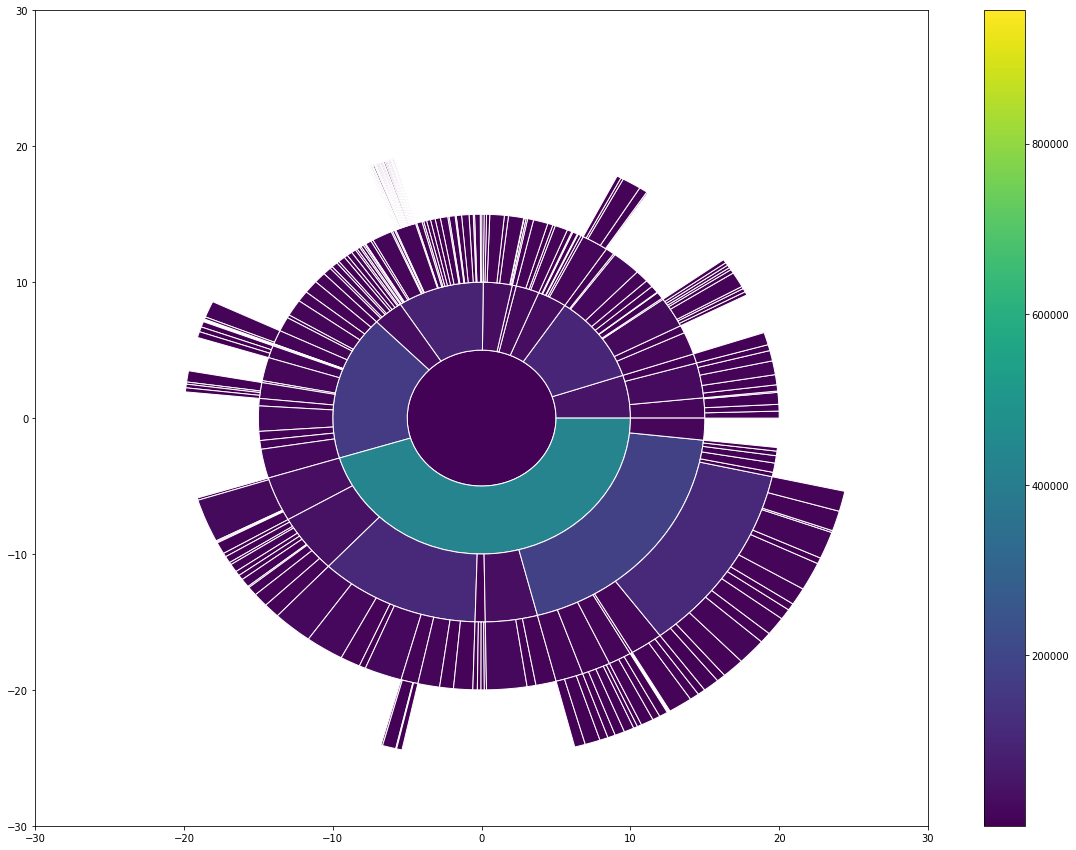

In [14]:
VALUE = 5
fig1, ax1 = plt.subplots(figsize=(20,15))


plt.xlim([-30, 30])
plt.ylim([-30, 30])
sh = nx.shortest_path_length(G, 'flare')



importer = DictImporter()
root = importer.import_(js_data)
pat = {}
max_val = 956129
d = 0
def parse_json3(parent, data, value):
    
    curr = parent
    
    if curr == None:
        ax1.add_patch(Circle((0, 0),radius=5,edgecolor= 'white', facecolor=cm.viridis(1)))
        pat[data.name]=0
    if sh[data.name] >= value:
        return

    elif curr !=None:

        deg_0 = pat[parent]
        size_num_p = cols[parent]
        level = sh[parent]
        node_size = cols[data.name]
        r = (level + 2)*5
        size_perc = (cols[data.name]/max_val)*360
        theta1 = deg_0
        theta2 = deg_0 + size_perc
        ax1.add_patch(Wedge((0, 0),r=r, theta1=theta1,theta2= theta2,edgecolor= 'white', facecolor=cm.viridis(node_size/max_val), width =5))
        pat[parent] = theta2
        pat[data.name] = theta1
   
    if len(data.children) == 0:
        return
    
    for i in data.children:
            parse_json3(i.parent.name,i, value)
            
   
    return 
  
parse_json3(None, root, VALUE)
c = plt.get_cmap("viridis")
m = ScalarMappable(Normalize(min(col_lis), max(col_lis)), c)

clb = plt.colorbar(m)

plt.show()

In [6]:
# #
# class Window(QDialog):


#     # constructor
#     def __init__(self, parent=None):
#         super(Window, self).__init__(parent)
#         title = 'plot'
#         width = 900
#         height = 400
#         left = 900
#         top = 400
#         self.x = ""
#         self.y = 0
#         c = 0
#         s= 0
        
        
#         self.fig = plt.figure()
#         self.canvas = FigureCanvas(self.fig)
        
        
#         self.button = QPushButton("Change", self)
#         self.button.setCheckable(True) 
#         self.button.pressed.connect(self.find)
        
#         grid = QVBoxLayout()
#        # grid.addWidget(self.canvas)
      
#         self.mySlider = QSlider(Qt.Horizontal, self)
#         self.mySlider.valueChanged[int].connect(self.changeValue)
#         self.mySlider.setRange(0, 4)
        
        
        
#         #grid.addWidget(self.xComboBox)
#         grid.addWidget(self.mySlider)
#         grid.addWidget(self.button)
#         self.setLayout(grid)
#         self.patches = []
#         #self.show()
#         #self.update()
   
#     def outer2(self, p, d, value):
#         ax = plt.gca()
#         plt.xlim([0, 10])
#         plt.ylim([0, 100])
#         importer = DictImporter()
#         pat = {}
#         max_val = 956129
   
#         sh = nx.shortest_path_length(G, 'flare')
#         def parse_json2(parent, data, value):     
#             curr = parent
#             if sh[data.name] >= value:
#                 return
#             if curr == None:
#                 #ax.add_patch(Rectangle((0, 0), 2, 100, edgecolor= 'white', facecolor=cm.viridis(1)))
#                 self.patches.append(Rectangle((0, 0), 2, 100, edgecolor= 'white', facecolor=cm.viridis(1)))
                
#                 pat[data.name]=[(0,0), 2, 100]
#             elif curr !=None:

#                 gr_info_p = pat[parent]
#                 size_num_p = cols[parent]
#                 level = sh[parent]
#                 node_size = cols[data.name]
#                 x = (level + 1)*2
#                 size_perc = (cols[data.name]/max_val)*100
#                 y = gr_info_p[0][1] 
#                 #ax.add_patch(Rectangle((x,y),2,size_perc, edgecolor ='white', facecolor=cm.viridis(node_size/max_val)))
#                 self.patches.append(Rectangle((x,y),2,size_perc, edgecolor ='white', facecolor=cm.viridis(node_size/max_val)))
#                 t = [(gr_info_p[0][0], gr_info_p[0][1]+size_perc), gr_info_p[1], gr_info_p[2]]
#                 pat[parent] = t
#                 pat[data.name] = [(x,y),2,size_perc]

#             if len(data.children) == 0:
#                 return

#             for i in data.children:

#                     parse_json2(i.parent.name,i, value)
         
#             return 
#         parse_json2(p,d, value)

#     def outer3(self, p, d, value):   
#         #fig, ax1 = plt.subplots(figsize=(10,20))\
    
#         plt.xlim([-30, 30])
#         plt.ylim([-30, 30])
#         importer = DictImporter()
#         pat = {}
#         max_val = 956129
        
#         sh = nx.shortest_path_length(G, 'flare')
        
#         def parse_json3(parent, data, value):

#             curr = parent

#             if curr == None:
#                 #ax.add_patch(Circle((0, 0),radius=5,edgecolor= 'white', facecolor=cm.viridis(1)))
#                 self.patches.append(Circle((0, 0),radius=5,edgecolor= 'white', facecolor=cm.viridis(1)))
               
#                 pat[data.name]=0
#             if sh[data.name] >= value:
#                 return

#             elif curr !=None:

#                 deg_0 = pat[parent]
#                 size_num_p = cols[parent]
#                 level = sh[parent]
#                 node_size = cols[data.name]
#                 r = (level + 2)*5
#                 size_perc = (cols[data.name]/max_val)*360
#                 theta1 = deg_0
#                 theta2 = deg_0 + size_perc
#                 #ax.add_patch(Wedge((0, 0),r=r, theta1=theta1,theta2= theta2,edgecolor= 'white', facecolor=cm.viridis(node_size/max_val), width =5))
#                 self.patches.append(Wedge((0, 0),r=r, theta1=theta1,theta2= theta2,edgecolor= 'white', facecolor=cm.viridis(node_size/max_val), width =5))
#                 pat[parent] = theta2
#                 pat[data.name] = theta1

#             if len(data.children) == 0:
#                 return

#             for i in data.children:
#                     parse_json3(i.parent.name,i, value)


#             return 
#         parse_json3(p,d, value)
#         return 
    

        
#     def find(self):

#         self.fig.clear()
#         plt.clf()
#         ax = plt.gca()
#         #fig1, ax1 = plt.subplots(figsize=(12,20))
#         #ax = self.fig.add_subplot(111)
#         root = importer.import_(js_data)
#         if self.button.isChecked():
#             self.outer3(None, root, 5)
#             for i in self.patches:
#                 ax.add_patch(i)
#         else:
#             self.outer2(None, root, 5)
#             for i in self.patches:
#                 ax.add_patch(i)
            
#         self.patches = []
#         plt.show()
#         self.canvas.draw()
            
            
#     def changeValue(self, value):

#         self.fig.clear()
#         plt.clf()
#         key_sub = [k for k,v in sh.items() if v > value]
    

        
#         # create an axis
#         #ax = self.fig.add_subplot(111)
# #         if self.button.isChecked():
# #                 #ax1.scatter(x=[8,3],y=[3,0])
# #                 p = 'twopi'
# #         else:
# #                 p = 'dot'
# #         sub_col = []
# #         for i in G.nodes:
# #             sub_col.append(cols[i])
# #         pos=nx.nx_agraph.graphviz_layout(G,prog=p)
# #         nx.draw(G,pos,node_size=20,node_color=sub_col,alpha=0.5,with_labels=True)
# #         G.add_nodes_from(key_sub)
# #         G.add_edges_from(edge_lis)
#         root = importer.import_(js_data)
#         self.outer2(None, root, value)
#         plt.show
#         self.canvas.draw()



# if __name__ == '__main__':
#         # creating apyqt5 application
#         app = QApplication(sys.argv)

#         # creating a window object
#         main = Window()

#         # showing the window
#         main.show()

#         # loop
#         sys.exit(app.exec_())

SystemExit: 0

/Users/kruthikrishnappa/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3333: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
